In [1]:
#Testing Self Organising Map on Iris Dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def closest_node(data, t, map, m_rows, m_cols):
  # (row,col) of map node closest to data[t]

  result = (0,0)
    
  small_dist = 1.0e20

  for i in range(m_rows):
    for j in range(m_cols):
      ed = euc_dist(map[i][j], data[t])
      if ed < small_dist:
        small_dist = ed
        result = (i, j)
        
  return result

In [4]:
def euc_dist(v1, v2):
  return np.linalg.norm(v1 - v2)

In [9]:
def manhattan_dist(r1, c1, r2, c2):
  return np.abs(r1-r2) + np.abs(c1-c2)

In [6]:
def most_common(lst, n):
  # lst is a list of values 0 . . n
  if len(lst) == 0: return -1
    
  counts = np.zeros(shape=n, dtype=np.int)

  for i in range(len(lst)):
    counts[lst[i]] += 1
    
  return np.argmax(counts)

In [7]:
def main():
  # 0. get started
  from datetime import datetime as dt
  np.random.seed(1)
  Dim = 4
  Rows = 30; Cols = 30
  RangeMax = Rows + Cols
  LearnMax = 0.5
  StepsMax = 5000

  # 1. load data
  print("\nLoading Iris data into memory \n")
  data_file = "iris_data_012.txt"
    
  data_x = np.loadtxt(data_file, delimiter=",", usecols=range(0,4), dtype=np.float64)
  data_y = np.loadtxt(data_file, delimiter=",", usecols=[4], dtype=np.int)
  # option: normalize data  

  # 2. construct the SOM
  print("Constructing a 30x30 SOM from the iris data")
  map = np.random.random_sample(size=(Rows,Cols,Dim))
    
  for s in range(StepsMax):
    if s % (StepsMax/10) == 0: print("step = ", str(s))
    
    pct_left = 1.0 - ((s * 1.0) / StepsMax)
    curr_range = (int)(pct_left * RangeMax)
    curr_rate = pct_left * LearnMax

    t = np.random.randint(len(data_x))
    (bmu_row, bmu_col) = closest_node(data_x, t, map, Rows, Cols)
    for i in range(Rows):
      for j in range(Cols):
        if manhattan_dist(bmu_row, bmu_col, i, j) < curr_range:
          map[i][j] = map[i][j] + curr_rate * (data_x[t] - map[i][j])
        
  print("SOM construction complete. Now on to Visualization \n")

  # 3. construct U-Matrix/ Visualize
    
  print("Constructing U-Matrix from SOM")
  u_matrix = np.zeros(shape=(Rows,Cols), dtype=np.float64)
    
  for i in range(Rows):
    for j in range(Cols):
      v = map[i][j]  # a vector 
      sum_dists = 0.0; ct = 0
     
      if i-1 >= 0:    # above
        sum_dists += euc_dist(v, map[i-1][j]); ct += 1
      if i+1 <= Rows-1:   # below
        sum_dists += euc_dist(v, map[i+1][j]); ct += 1
      if j-1 >= 0:   # left
        sum_dists += euc_dist(v, map[i][j-1]); ct += 1
      if j+1 <= Cols-1:   # right
        sum_dists += euc_dist(v, map[i][j+1]); ct += 1
      
      u_matrix[i][j] = sum_dists / ct
        
  print("U-Matrix constructed \n")

  # display U-Matrix
  plt.imshow(u_matrix, cmap='gray')  # black = close = clusters
  plt.show()

  # 4. because the data has labels, another possible visualization:
  # associate each data label with a map node
  print("Associating each data label to one map node ")
  mapping = np.empty(shape=(Rows,Cols), dtype=object)
  for i in range(Rows):
    for j in range(Cols):
      mapping[i][j] = []

  for t in range(len(data_x)):
    (m_row, m_col) = closest_node(data_x, t, map, Rows, Cols)
    mapping[m_row][m_col].append(data_y[t])

  label_map = np.zeros(shape=(Rows,Cols), dtype=np.int)
  for i in range(Rows):
    for j in range(Cols):
      label_map[i][j] = most_common(mapping[i][j], 3)
 
  plt.imshow(label_map, cmap=plt.cm.get_cmap('terrain_r', 4))
    
  plt.colorbar()
  plt.show()
  timeNow = dt.now()
  timestamp = dt.timestamp(timeNow)

  print("SOM Complete at: " + str(timeNow))


Loading Iris data into memory 

Constructing a 30x30 SOM from the iris data
step =  0
step =  500
step =  1000
step =  1500
step =  2000
step =  2500
step =  3000
step =  3500
step =  4000
step =  4500
SOM construction complete. Now on to Visualization 

Constructing U-Matrix from SOM
U-Matrix constructed 



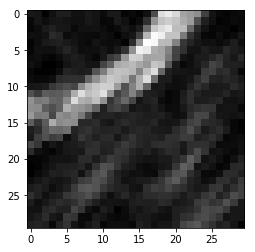

Associating each data label to one map node 


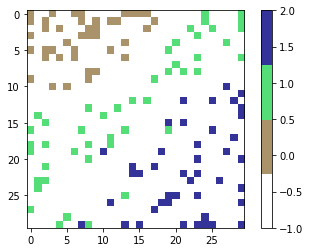

SOM Complete at: 2019-05-12 18:32:02.535625


In [8]:
main()